In [9]:
from google.colab import files
import pandas as pd


uploaded = files.upload()




Saving blinkit_data.csv to blinkit_data (1).csv


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Data analysis project of Blinkit Data using python**


In [10]:
df = pd.read_csv("blinkit_data.csv")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [15]:
df.shape


(8523, 12)

In [16]:
df.size

102276

In [17]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [18]:
total_sales= df['Sales'].sum()
total_sales

np.float64(1201681.4808)

In [20]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [22]:
df['Item Weight']

,Item Weight
0,15.10
1,11.80
2,13.85
3,12.15
4,19.60
...,...
8518,NaN
8519,NaN
8520,NaN
8521,NaN


In [23]:
df['Item Fat Content']

,Item Fat Content
0,Regular
1,Low Fat
2,Regular
3,Regular
4,Low Fat
...,...
8518,low fat
8519,low fat
8520,low fat
8521,reg


In [27]:
print("size of Data:",df.shape)

size of Data: (8523, 12)


In [28]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


**Data Cleaning**

In [30]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [32]:
df['Item Fat Content']= df['Item Fat Content'].replace({'LF': 'Low Fat','low fat':'Low Fat' , 'reg':'Regular'  })

***Data Analysis***

**Key Requirements**

Total Sales: The overall revenue generated from all items sold

Average Sales: The average revenue per sale.

Number of Items: The total count of different items sold.

Average Rating: The average customer rating for items sold.


In [43]:
Total_sales= df['Sales'].sum()
print(f"Total_sales: ${Total_sales:.0f}")

Avg_sales=df['Sales'].mean()
print(f"Avg_sales:${Avg_sales:.0f}")

Items_count= df['Sales'].count()
print(f"Items_count:{Items_count:.0f}")

Avg_rating=df['Rating'].mean()
print(f"Avg_rating:{Avg_rating:.1f}")

Total_sales: $1201681
Avg_sales:$141
Items_count:8523
Avg_rating:4.0


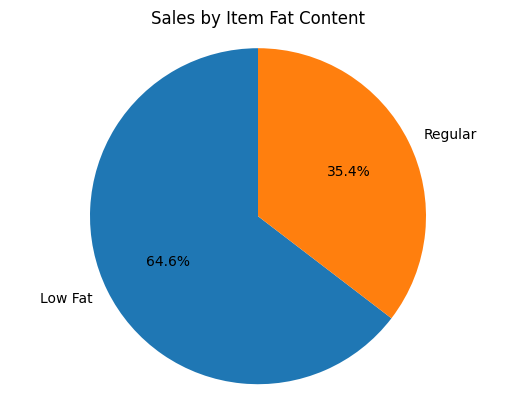

In [44]:
 sales_by_fat= df.groupby('Item Fat Content')['Sales'].sum()

 plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.1f%%',startangle=90)
 plt.title('Sales by Item Fat Content')
 plt.axis('equal')
 plt.show()

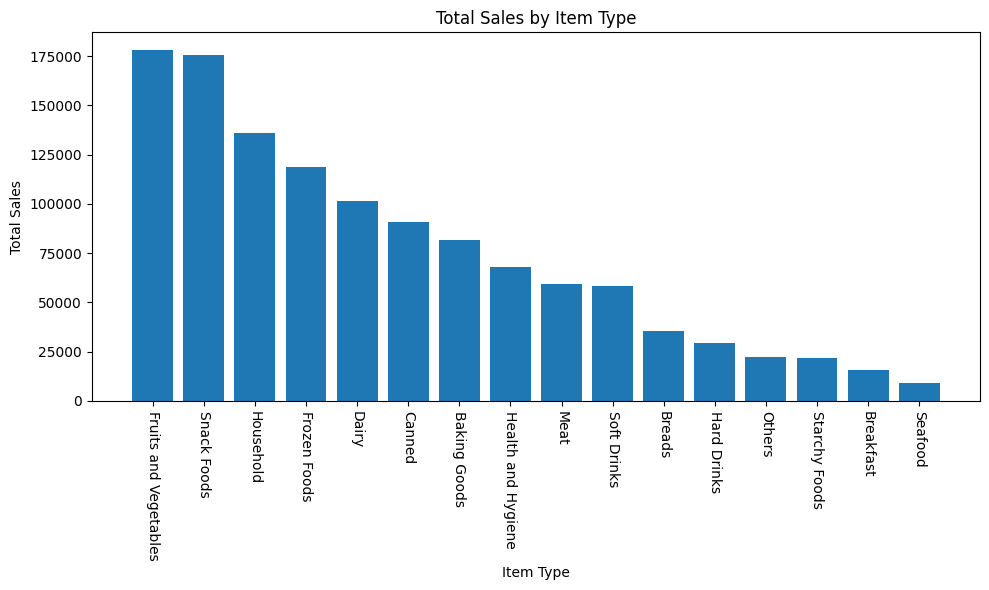

In [45]:
 sales_by_type = df.groupby('Item Type') ['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)

plt.xlabel('Item Type')

plt.ylabel('Total Sales')

plt.title('Total Sales by Item Type')

plt.tight_layout()

plt.show()

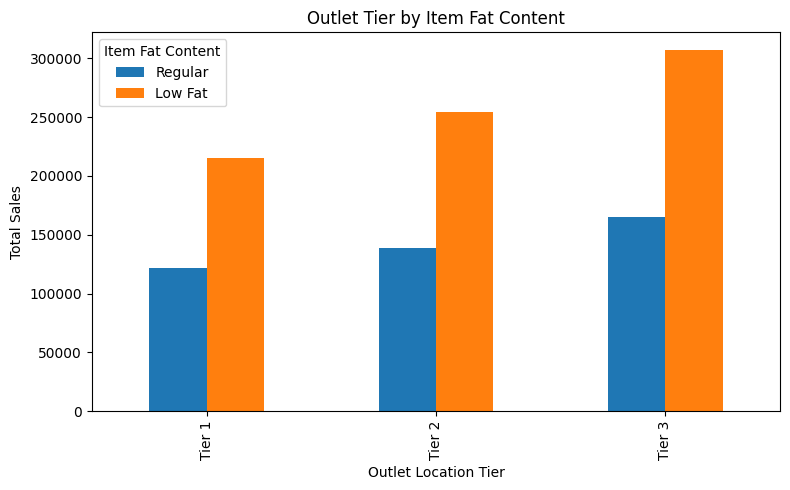

In [49]:


grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

grouped = grouped[['Regular', 'Low Fat']]


ax = grouped.plot(
    kind='bar',
    figsize=(8, 5),
    title='Outlet Tier by Item Fat Content'
)

plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


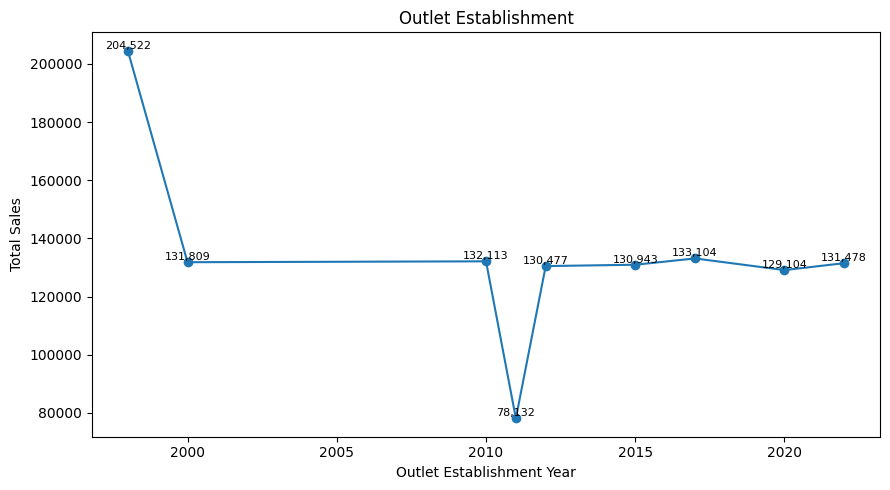

In [50]:


sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()


plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')


plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')


for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


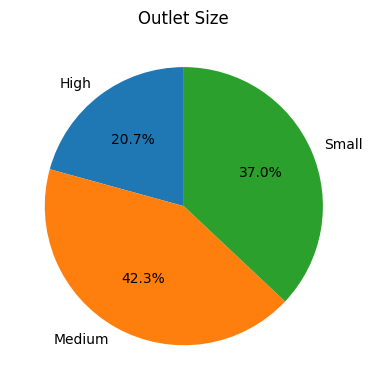

In [51]:
import matplotlib.pyplot as plt


sales_by_size = df.groupby('Outlet Size')['Sales'].sum()


plt.figure(figsize=(4, 4))
plt.pie(
    sales_by_size,
    labels=sales_by_size.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Outlet Size')
plt.tight_layout()
plt.show()


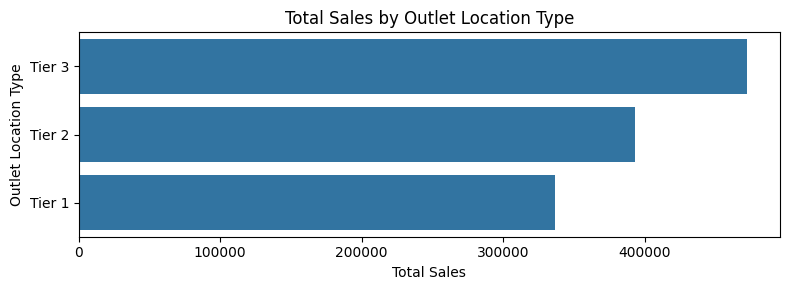

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()

sales_by_location = sales_by_location.sort_values('Sales', ascending=False)


plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)


plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()
